# **Load the CEDAR Dataset(CNN)**

## **Import Necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import re
from collections import OrderedDict
from math import factorial
from copy import deepcopy
import pickle
import random
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread
import matplotlib.pyplot as plt

## **View the Forge Signatures**

Text(0.5, 1.0, 'Forge_23')

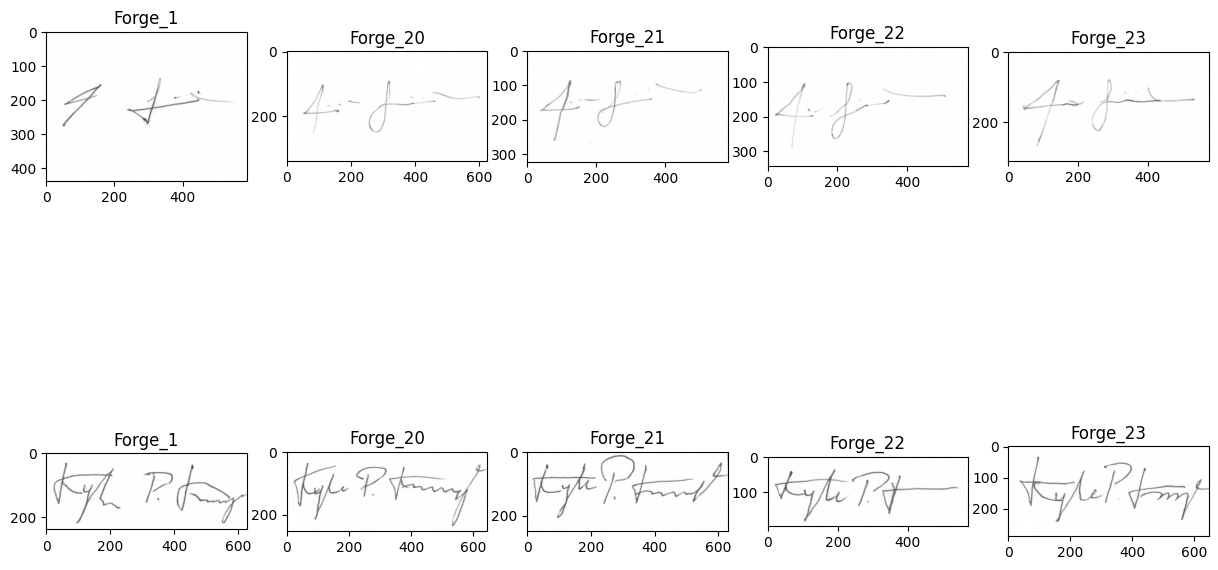

In [ ]:
image1 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/forgeries_1_1.png")
image2 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/forgeries_1_20.png")
image3 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/forgeries_1_21.png")
image4 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/forgeries_1_22.png")
image5 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/forgeries_1_23.png")
image6 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/forgeries_11_1.png")
image7 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/forgeries_11_20.png")
image8 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/forgeries_11_21.png")
image9 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/forgeries_11_22.png")
image10 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/forgeries_11_23.png")

fig, ax = plt.subplots(2,5, figsize = (15,10))
plt.subplots_adjust(hspace=0)

ax[0,0].imshow(image1)
ax[0,0].set_title("Forge_1")
ax[0,1].imshow(image2)
ax[0,1].set_title("Forge_20")
ax[0,2].imshow(image3)
ax[0,2].set_title("Forge_21")
ax[0,3].imshow(image4)
ax[0,3].set_title("Forge_22")
ax[0,4].imshow(image5)
ax[0,4].set_title("Forge_23")
ax[1,0].imshow(image6)
ax[1,0].set_title("Forge_1")
ax[1,1].imshow(image7)
ax[1,1].set_title("Forge_20")
ax[1,2].imshow(image8)
ax[1,2].set_title("Forge_21")
ax[1,3].imshow(image9)
ax[1,3].set_title("Forge_22")
ax[1,4].imshow(image10)
ax[1,4].set_title("Forge_23")

## **Preproecessing the Forge images**

Text(0.5, 1.0, 'Forge_23')

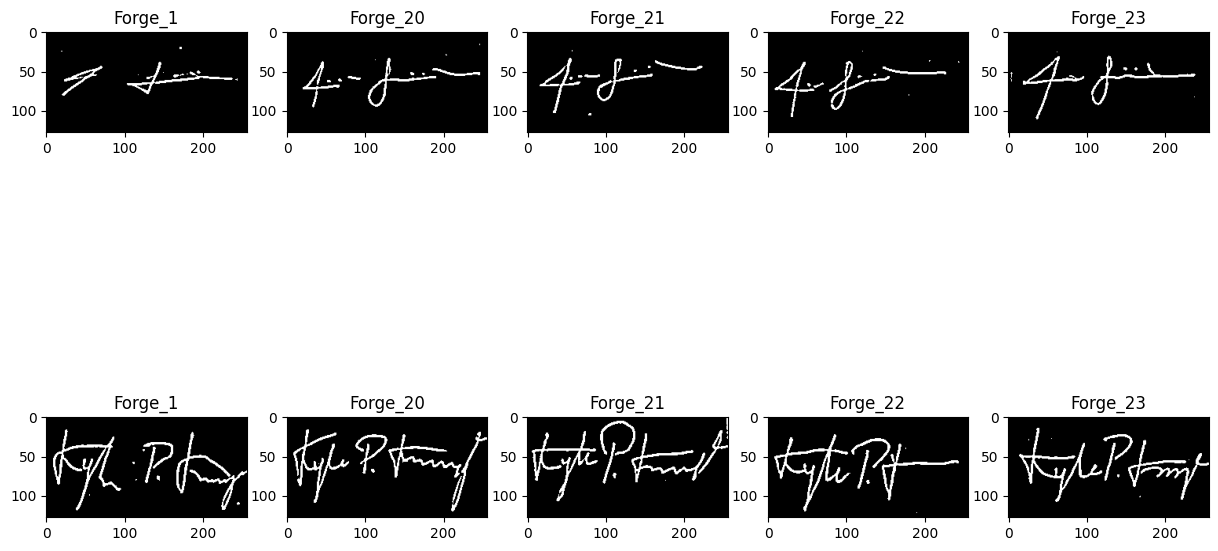

In [ ]:
import cv2

def preprocess_image(image):
    # Convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image
    img = cv2.resize(image, (256, 128))
    # Apply Gaussian Blur to remove noise
    img = cv2.GaussianBlur(img, (5, 5), 0)
    # Apply adaptive thresholding
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return img

preprocessed_image1 = preprocess_image(image1)
preprocessed_image2 = preprocess_image(image2)
preprocessed_image3 = preprocess_image(image3)
preprocessed_image4 = preprocess_image(image4)
preprocessed_image5 = preprocess_image(image5)
preprocessed_image6 = preprocess_image(image6)
preprocessed_image7 = preprocess_image(image7)
preprocessed_image8 = preprocess_image(image8)
preprocessed_image9 = preprocess_image(image9)
preprocessed_image10 = preprocess_image(image10)

fig, ax = plt.subplots(2,5, figsize = (15,10))
plt.subplots_adjust(hspace=0)

ax[0,0].imshow(preprocessed_image1, cmap='gray')
ax[0,0].set_title("Forge_1")
ax[0,1].imshow(preprocessed_image2, cmap='gray')
ax[0,1].set_title("Forge_20")
ax[0,2].imshow(preprocessed_image3, cmap='gray')
ax[0,2].set_title("Forge_21")
ax[0,3].imshow(preprocessed_image4, cmap='gray')
ax[0,3].set_title("Forge_22")
ax[0,4].imshow(preprocessed_image5, cmap='gray')
ax[0,4].set_title("Forge_23")
ax[1,0].imshow(preprocessed_image6, cmap='gray')
ax[1,0].set_title("Forge_1")
ax[1,1].imshow(preprocessed_image7, cmap='gray')
ax[1,1].set_title("Forge_20")
ax[1,2].imshow(preprocessed_image8, cmap='gray')
ax[1,2].set_title("Forge_21")
ax[1,3].imshow(preprocessed_image9, cmap='gray')
ax[1,3].set_title("Forge_22")
ax[1,4].imshow(preprocessed_image10, cmap='gray')
ax[1,4].set_title("Forge_23")

## **View the Real Signatures**

Text(0.5, 1.0, 'Real_23')

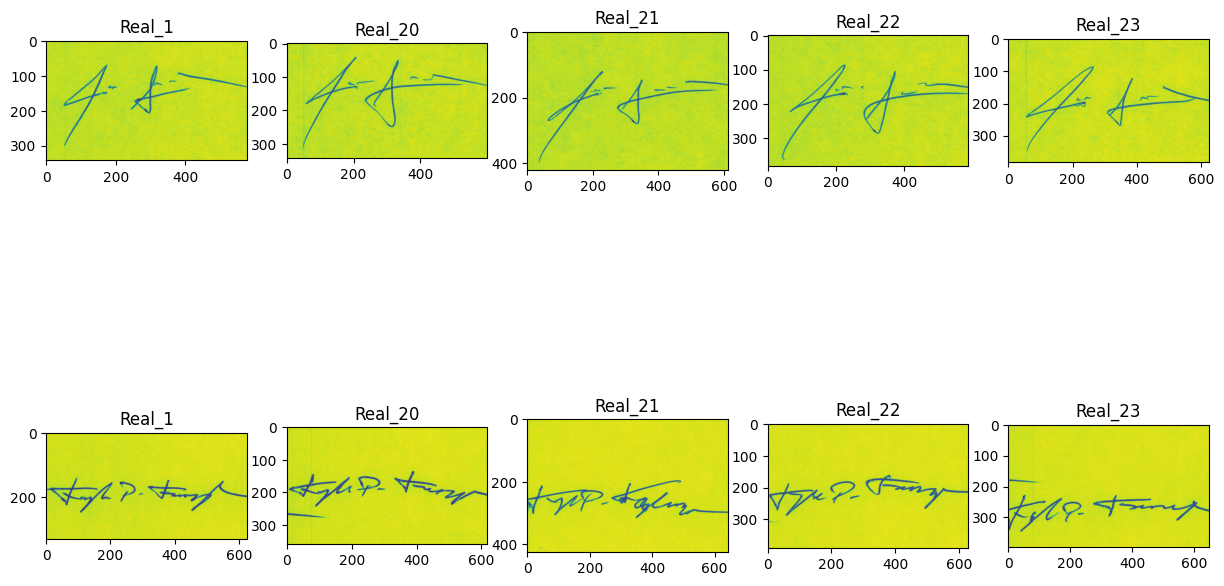

In [ ]:
image11 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/original_1_1.png")
image12 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/original_1_20.png")
image13 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/original_1_21.png")
image14 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/original_1_22.png")
image15 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/original_1_23.png")
image16 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/original_11_1.png")
image17 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/original_11_20.png")
image18 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/original_11_21.png")
image19 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/original_11_22.png")
image20 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/original_11_23.png")

fig, ax = plt.subplots(2,5, figsize = (15,10))
plt.subplots_adjust(hspace=0)

ax[0,0].imshow(image11)
ax[0,0].set_title("Real_1")
ax[0,1].imshow(image12)
ax[0,1].set_title("Real_20")
ax[0,2].imshow(image13)
ax[0,2].set_title("Real_21")
ax[0,3].imshow(image14)
ax[0,3].set_title("Real_22")
ax[0,4].imshow(image15)
ax[0,4].set_title("Real_23")
ax[1,0].imshow(image16)
ax[1,0].set_title("Real_1")
ax[1,1].imshow(image17)
ax[1,1].set_title("Real_20")
ax[1,2].imshow(image18)
ax[1,2].set_title("Real_21")
ax[1,3].imshow(image19)
ax[1,3].set_title("Real_22")
ax[1,4].imshow(image20)
ax[1,4].set_title("Real_23")

Text(0.5, 1.0, 'Real_23')

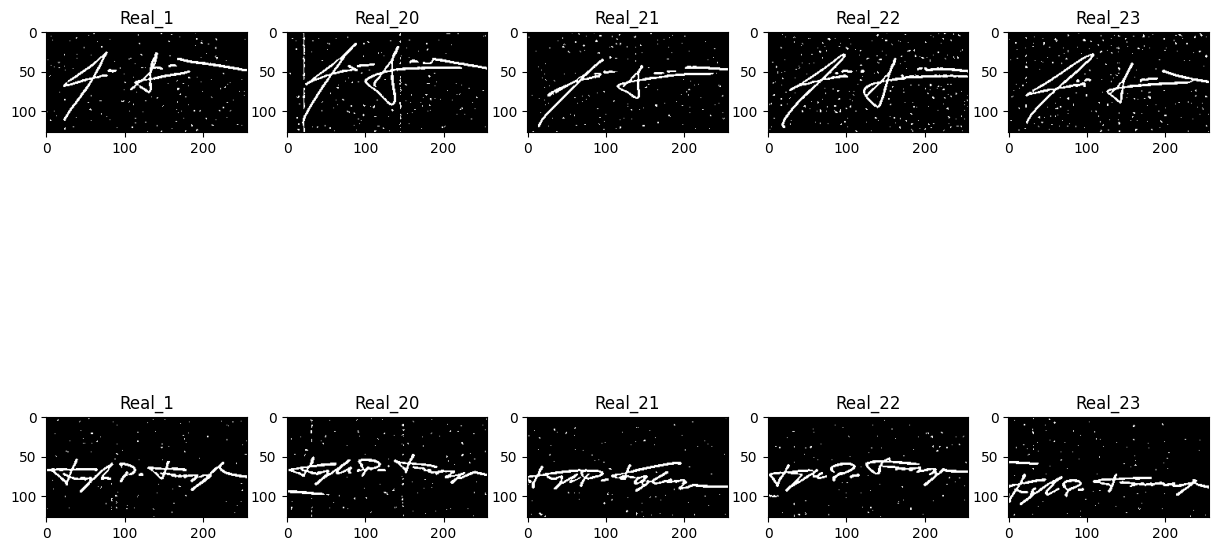

In [ ]:
def preprocess_image(image):
    # Convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image
    img = cv2.resize(image, (256, 128))
    # Apply Gaussian Blur to remove noise
    img = cv2.GaussianBlur(img, (5, 5), 0)
    # Apply adaptive thresholding
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return img

preprocessed_image11 = preprocess_image(image11)
preprocessed_image12 = preprocess_image(image12)
preprocessed_image13 = preprocess_image(image13)
preprocessed_image14 = preprocess_image(image14)
preprocessed_image15 = preprocess_image(image15)
preprocessed_image16 = preprocess_image(image16)
preprocessed_image17 = preprocess_image(image17)
preprocessed_image18 = preprocess_image(image18)
preprocessed_image19 = preprocess_image(image19)
preprocessed_image20 = preprocess_image(image20)

fig, ax = plt.subplots(2,5, figsize = (15,10))
plt.subplots_adjust(hspace=0)

ax[0,0].imshow(preprocessed_image11, cmap='gray')
ax[0,0].set_title("Real_1")
ax[0,1].imshow(preprocessed_image12, cmap='gray')
ax[0,1].set_title("Real_20")
ax[0,2].imshow(preprocessed_image13, cmap='gray')
ax[0,2].set_title("Real_21")
ax[0,3].imshow(preprocessed_image14, cmap='gray')
ax[0,3].set_title("Real_22")
ax[0,4].imshow(preprocessed_image15, cmap='gray')
ax[0,4].set_title("Real_23")
ax[1,0].imshow(preprocessed_image16, cmap='gray')
ax[1,0].set_title("Real_1")
ax[1,1].imshow(preprocessed_image17, cmap='gray')
ax[1,1].set_title("Real_20")
ax[1,2].imshow(preprocessed_image18, cmap='gray')
ax[1,2].set_title("Real_21")
ax[1,3].imshow(preprocessed_image19, cmap='gray')
ax[1,3].set_title("Real_22")
ax[1,4].imshow(preprocessed_image20, cmap='gray')
ax[1,4].set_title("Real_23")

## **Put all the preprocessed image as one**

In [ ]:
preprocessed_images = [
    preprocessed_image1,
    preprocessed_image2,
    preprocessed_image3,
    preprocessed_image4,
    preprocessed_image5,
    preprocessed_image6,
    preprocessed_image7,
    preprocessed_image8,
    preprocessed_image9,
    preprocessed_image10,
    preprocessed_image11,
    preprocessed_image12,
    preprocessed_image13,
    preprocessed_image14,
    preprocessed_image15,
    preprocessed_image16,
    preprocessed_image17,
    preprocessed_image18,
    preprocessed_image19,
    preprocessed_image20
]

labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 1 for forgeries, 0 for real

## **Split/Train the data**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming preprocessed_images is a list of NumPy arrays or tensors
X = np.array(preprocessed_images)
y = np.array(labels)

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## **Save the test and train images in the directory**

### **Create Folders as Real and forge**

In [ ]:
import cv2
import os
base_dir = "/content/drive/MyDrive/Data/signatures"

# Step 4: Create folders
os.makedirs(os.path.join(base_dir, "train", "real"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "train", "forgery"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "test", "real"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "test", "forgery"), exist_ok=True)


### **Save the image in the directory**

In [ ]:
# Step 5: Save image function
def save_images(images, labels, folder_name):
    for i, (img, label) in enumerate(zip(images, labels)):
        subfolder = "forgery" if label == 1 else "real"
        save_path = os.path.join(base_dir, folder_name, subfolder, f"{subfolder}_{i}.png")

        # Fix image format
        if img.max() <= 1.0:
            img = (img * 255).astype('uint8')
        else:
            img = img.astype('uint8')

        # Handle shape (H, W, 1) → (H, W) for grayscale
        if len(img.shape) == 3 and img.shape[-1] == 1:
            img = img.squeeze()

        cv2.imwrite(save_path, img)

In [ ]:
save_images(X_train, y_train, "train")
save_images(X_test, y_test, "test")

### **Buliding the CNN model**

In [ ]:
train_path = '/content/drive/MyDrive/Data/signatures/train'
test_path = '/content/drive/MyDrive/Data/signatures/test'

### **Define the height and width of the Image**

In [ ]:
Image_Width = 256
Image_Height = 256
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3
batch_size=15

### **Import the necessary Library**

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob

### **Core of the CNN**


*   Convloution Layer
*   Activation layer
*   Pooling layer
*   BatchNormalization
*   Flatten the images
*   Fully connected layers
*   output layer(Where the classifcation happens using softmax)



In [ ]:
model = Sequential()

# Feature Learning Layers
model.add(Conv2D(32,                  # Number of filters/Kernels
                     (3,3),               # Size of kernels (3x3 matrix)
                     strides = 1,         # Step size for sliding the kernel across the input (1 pixel at a time).
                     padding = 'same',    # 'Same' ensures that the output feature map has the same dimensions as the input by padding zeros around the input.
                    input_shape = (256,256,3) # Input image shape
                    ))
model.add(Activation('relu'))# Activation function
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

# Flattening tensors
model.add(Flatten())

# Fully-Connected Layers
model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(2, activation = 'softmax')) # Classification layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Define the loss function**

In [ ]:
import tensorflow as tf
# Compiling model
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001), # 1e-4
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric

### **Check the summary**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 512)    │         2,04

 Total params: 69,244,610 (264.15 MB)

 Trainable params: 69,242,626 (264.14 MB)

 Non-trainable params: 1,984 (7.75 KB)

### **Callbacks and early-stoping**
*    these callbacks help you train your model more efficiently and effectively by automatically stopping the training when it's no longer productive and adjusting the learning rate to improve performance.
*    EarlyStopping: This callback monitors the model's performance on the validation set and stops the training process if the performance doesn't improve for a certain number of epochs (in this case, 10).
*    ReduceLROnPlateau: This callback reduces the learning rate when the validation accuracy stops improving.

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [early_stop, learning_rate_reduction]


### **Data agumentation**


*    it is usually a good practice to artificially introduce some diversity to the sample by applying random transformations to the images used in training. This is good because it helps to expose the model to a wider variety of images and avoids overfitting.
*   There are seven different randome transformation
*   tf.keras.layers.RandomCrop: It chooses a location to crop images down to a target size.
* tf.keras.layers.RandomFlip:This layer randomly flips images horizontally and or vertically based on the mode attribute.
* tf.keras.layers.RandomTranslation: This layer randomly applies translations to each image during training according to the fill_mode attribute.
* tf.keras.layers.RandomBrightness:  This layer randomly increases/reduces the brightness for the input RGB images.
* tf.keras.layers.RandomRotation: This layer randomly rotates the images during training, and also fills empty spaces according to the fill_mode attribute.
* tf.keras.layers.RandomZoom: This layer randomly zooms in or out on each axis of each image independently during training.
* tf.keras.layers.RandomContrast:



In [ ]:
train_data = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,)

In [ ]:
train_generator = train_data.flow_from_directory('/content/drive/MyDrive/Data/signatures/train',
                                              target_size=Image_Size,
                                              batch_size=32,
                                              class_mode = 'categorical')

Found 16 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Data/signatures/test',
                                                  target_size=Image_Size,
                                                  batch_size = 32,
                                                  class_mode='categorical')

Found 4 images belonging to 2 classes.


In [ ]:
epochs = 10

history = model.fit(train_generator,
                             epochs=epochs,
                             validation_data=test_generator,
                             validation_steps=len(test_generator),
                             steps_per_epoch=len(train_generator),
                             callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 2.3964 - val_accuracy: 0.5000 - val_loss: 0.8166 - learning_rate: 1.0000e-04
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 41.3561 - val_accuracy: 0.5000 - val_loss: 0.6654 - learning_rate: 1.0000e-04
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5625 - loss: 22.6172 - val_accuracy: 0.7500 - val_loss: 0.5088 - learning_rate: 1.0000e-04
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.6250 - loss: 8.4784 - val_accuracy: 0.5000 - val_loss: 0.6081 - learning_rate: 1.0000e-04
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.8750 - loss: 2.6205 - val_accuracy: 0.5000 - val_loss: 0.9688 - learning_rate: 1.0000e-04
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9375 - loss: 0.1085 - val_accuracy: 0.5000 - val_loss: 1.4812 - learning_rate: 1.0000e-04
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.8750 - loss: 0.7949 - val_accuracy: 0.5000 - val_loss: 1.9288 - learning_rate: 1.0000e-04
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9375 - loss: 0.5772 - val_accu

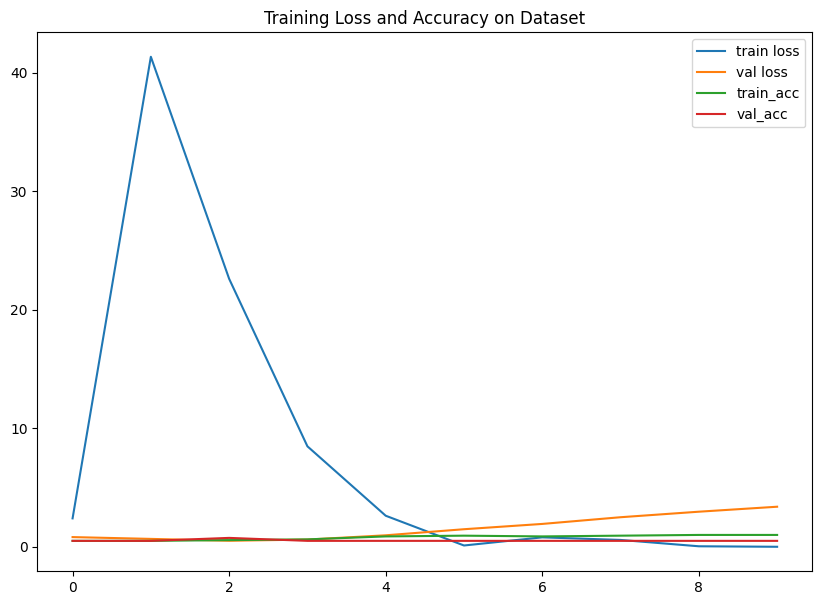

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on Dataset")
plt.legend()
plt.show()
plt.savefig('lossval_loss')

In [ ]:
from tensorflow.keras.models import load_model

model.save('signature_model.h5')

In [ ]:
pred = model.predict(test_generator)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


array([[9.9867934e-01, 1.3206255e-03],
       [9.9898285e-01, 1.0171172e-03],
       [9.9945968e-01, 5.4029736e-04],
       [9.9921739e-01, 7.8253704e-04]], dtype=float32)

In [ ]:
import numpy as np

pred = np.argmax(pred, axis=1)
pred

array([0, 0, 0, 0])

In [ ]:
model = load_model('signature_model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

img = image.load_img('/content/drive/MyDrive/Data/signatures/signatures_12/forgeries_12_1.png', target_size=(256,256))

In [ ]:
x = image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [252., 252., 252.],
        ...,
        [253., 253., 253.],
        [253., 253., 253.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [253., 253., 253.],
        [254., 254., 254.],
        ...,
        [252., 252., 252.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [253., 253., 253.],
        [253., 253., 253.],
        ...,
        [251., 251., 251.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 254.],
        ...,
        [255., 255., 255.],
        [253., 253., 253.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [252., 252., 252.],
        ...,
        [251., 251., 251.],
        [252., 252., 252.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [252., 2

In [ ]:
x.shape

(256, 256, 3)

In [ ]:
x = x/255

from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 256, 256, 3)

In [ ]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


array([[0., 1.]], dtype=float32)

In [ ]:
a=model.predict(img_data)
score = a[0][np.argmax(a)]
predicted_class = np.argmax(a, axis=1)

if(predicted_class==1):
    print(f"The signature is fraud with a confidence of {score:.2f}")
else:
    print(f"The signature is not fraud with a confidence of {score:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
The signature is fraud with a confidence of 1.00


### **Checking with the two different and checking the value**


*   Why it is always geniue
*   Because we trained with single data/input so the ouput will be according to that
*   To compare two images and determine if they are from the same person, you would typically use a different kind of model called a Siamese Network. This type of network is specifically designed to learn a similarity function between two inputs.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


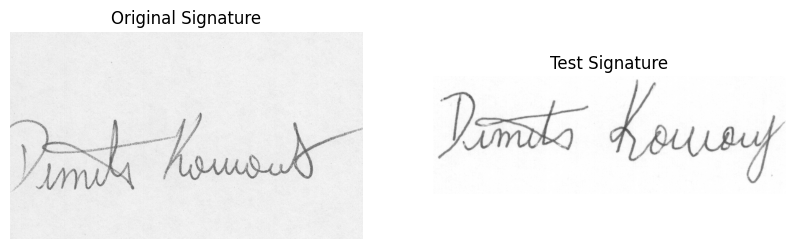

The test signature is predicted to be GENUINE with a confidence of 1.00


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('signature_model.h5')

def preprocess_for_prediction(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Provide the paths to your images here
original_image_path = '/content/drive/MyDrive/Data/signatures/signatures_13/original_13_1.png'
test_image_path = '/content/drive/MyDrive/Data/signatures/signatures_13/forgeries_13_1.png'

original_img_for_display = cv2.imread(original_image_path)
test_img_for_display = cv2.imread(test_image_path)

preprocessed_test_img = preprocess_for_prediction(test_image_path)

prediction = model.predict(preprocessed_test_img)
predicted_class = np.argmax(prediction, axis=1)
confidence = np.max(prediction)

# Display the images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(original_img_for_display, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Signature')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(test_img_for_display, cv2.COLOR_BGR2RGB))
ax[1].set_title('Test Signature')
ax[1].axis('off')

plt.show()

# Print the prediction
if predicted_class[0] == 1:
    print(f"The test signature is predicted to be a FORGERY with a confidence of {confidence:.2f}")
else:
    print(f"The test signature is predicted to be GENUINE with a confidence of {confidence:.2f}")

In [ ]:
print("Raw prediction output:", prediction)
print("Predicted class:", predicted_class)
print("Confidence:", confidence)


Raw prediction output: [[0.9986833 0.0013167]]
Predicted class: [0]
Confidence: 0.9986833


## **SNN**

### **Import necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import os
import re
from collections import OrderedDict
from math import factorial
from copy import deepcopy
import pickle
import random
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import cv2
import numpy as np
from PIL import Image
from keras import backend as K
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten,Activation
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from keras import callbacks
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras.models import Model,load_model, model_from_json
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization


### **Define the Forgeries Signature**

Text(0.5, 1.0, 'Forge_23')

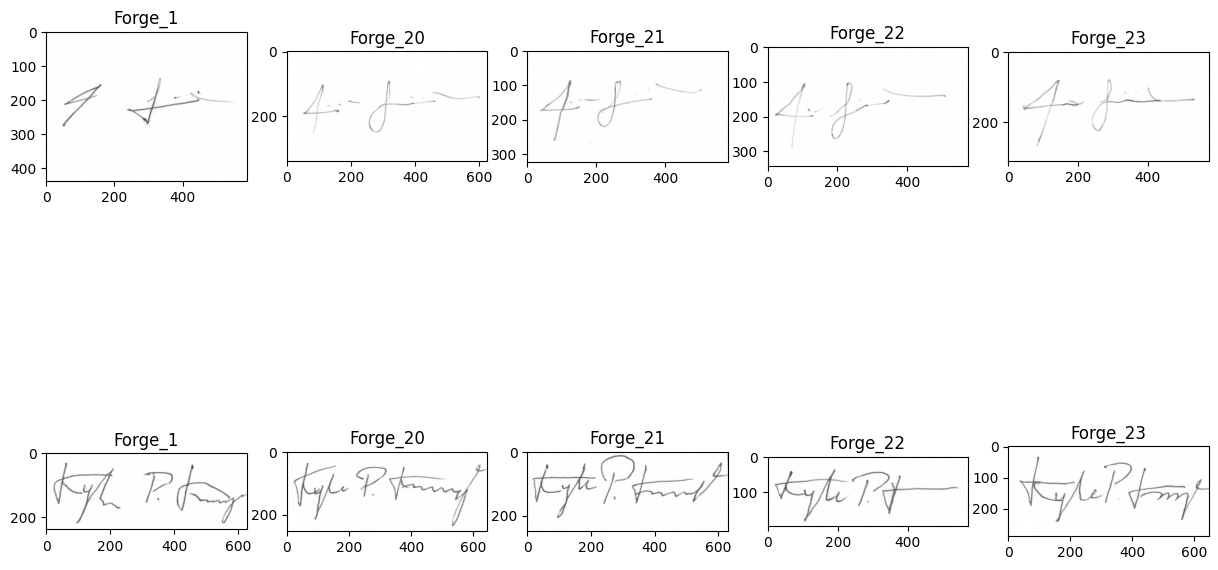

In [3]:
image1 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/forgeries_1_1.png")
image2 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/forgeries_1_20.png")
image3 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/forgeries_1_21.png")
image4 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/forgeries_1_22.png")
image5 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/forgeries_1_23.png")
image6 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/forgeries_11_1.png")
image7 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/forgeries_11_20.png")
image8 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/forgeries_11_21.png")
image9 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/forgeries_11_22.png")
image10 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/forgeries_11_23.png")

fig, ax = plt.subplots(2,5, figsize = (15,10))
plt.subplots_adjust(hspace=0)

ax[0,0].imshow(image1)
ax[0,0].set_title("Forge_1")
ax[0,1].imshow(image2)
ax[0,1].set_title("Forge_20")
ax[0,2].imshow(image3)
ax[0,2].set_title("Forge_21")
ax[0,3].imshow(image4)
ax[0,3].set_title("Forge_22")
ax[0,4].imshow(image5)
ax[0,4].set_title("Forge_23")
ax[1,0].imshow(image6)
ax[1,0].set_title("Forge_1")
ax[1,1].imshow(image7)
ax[1,1].set_title("Forge_20")
ax[1,2].imshow(image8)
ax[1,2].set_title("Forge_21")
ax[1,3].imshow(image9)
ax[1,3].set_title("Forge_22")
ax[1,4].imshow(image10)
ax[1,4].set_title("Forge_23")

### **Preprocess the forgeries image**

Text(0.5, 1.0, 'Forge_23')

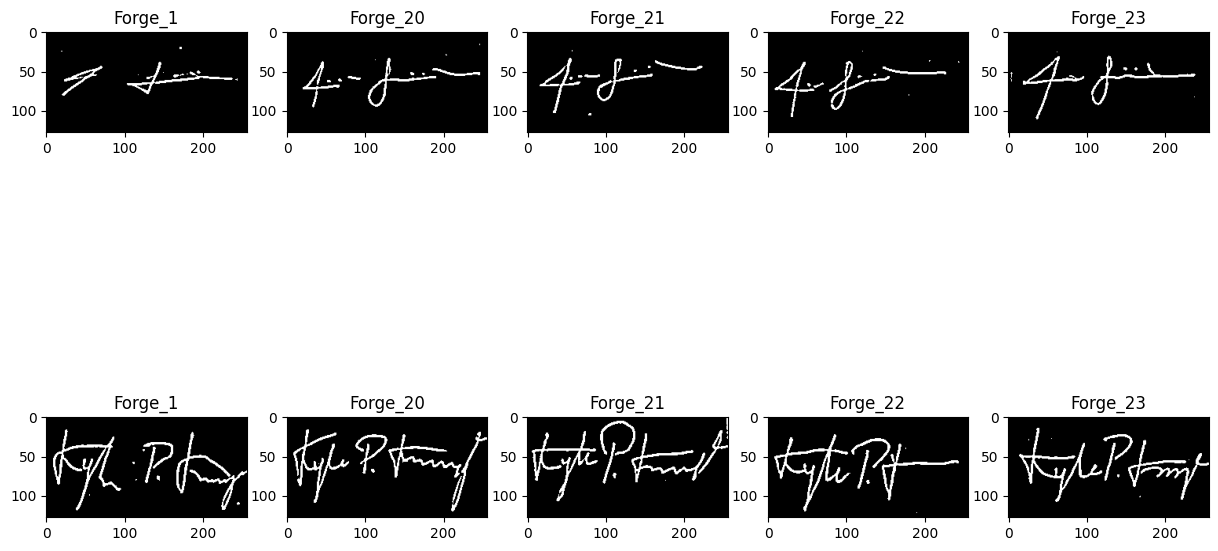

In [4]:
import cv2

def preprocess_image(image):
    # Convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image
    img = cv2.resize(image, (256, 128))
    # Apply Gaussian Blur to remove noise
    img = cv2.GaussianBlur(img, (5, 5), 0)
    # Apply adaptive thresholding
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return img

preprocessed_image1 = preprocess_image(image1)
preprocessed_image2 = preprocess_image(image2)
preprocessed_image3 = preprocess_image(image3)
preprocessed_image4 = preprocess_image(image4)
preprocessed_image5 = preprocess_image(image5)
preprocessed_image6 = preprocess_image(image6)
preprocessed_image7 = preprocess_image(image7)
preprocessed_image8 = preprocess_image(image8)
preprocessed_image9 = preprocess_image(image9)
preprocessed_image10 = preprocess_image(image10)

fig, ax = plt.subplots(2,5, figsize = (15,10))
plt.subplots_adjust(hspace=0)

ax[0,0].imshow(preprocessed_image1, cmap='gray')
ax[0,0].set_title("Forge_1")
ax[0,1].imshow(preprocessed_image2, cmap='gray')
ax[0,1].set_title("Forge_20")
ax[0,2].imshow(preprocessed_image3, cmap='gray')
ax[0,2].set_title("Forge_21")
ax[0,3].imshow(preprocessed_image4, cmap='gray')
ax[0,3].set_title("Forge_22")
ax[0,4].imshow(preprocessed_image5, cmap='gray')
ax[0,4].set_title("Forge_23")
ax[1,0].imshow(preprocessed_image6, cmap='gray')
ax[1,0].set_title("Forge_1")
ax[1,1].imshow(preprocessed_image7, cmap='gray')
ax[1,1].set_title("Forge_20")
ax[1,2].imshow(preprocessed_image8, cmap='gray')
ax[1,2].set_title("Forge_21")
ax[1,3].imshow(preprocessed_image9, cmap='gray')
ax[1,3].set_title("Forge_22")
ax[1,4].imshow(preprocessed_image10, cmap='gray')
ax[1,4].set_title("Forge_23")

### **Define the original images**

Text(0.5, 1.0, 'Real_23')

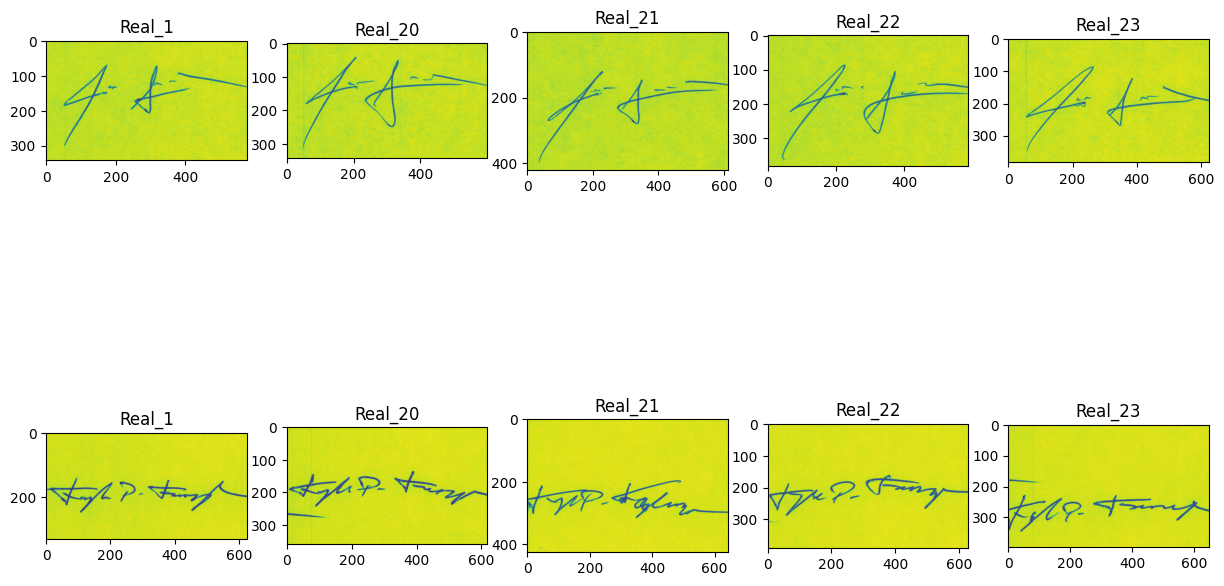

In [5]:
image11 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/original_1_1.png")
image12 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/original_1_20.png")
image13 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/original_1_21.png")
image14 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/original_1_22.png")
image15 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_1/original_1_23.png")
image16 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/original_11_1.png")
image17 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/original_11_20.png")
image18 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/original_11_21.png")
image19 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/original_11_22.png")
image20 = sk.imread("/content/drive/MyDrive/Data/signatures/signatures_11/original_11_23.png")

fig, ax = plt.subplots(2,5, figsize = (15,10))
plt.subplots_adjust(hspace=0)

ax[0,0].imshow(image11)
ax[0,0].set_title("Real_1")
ax[0,1].imshow(image12)
ax[0,1].set_title("Real_20")
ax[0,2].imshow(image13)
ax[0,2].set_title("Real_21")
ax[0,3].imshow(image14)
ax[0,3].set_title("Real_22")
ax[0,4].imshow(image15)
ax[0,4].set_title("Real_23")
ax[1,0].imshow(image16)
ax[1,0].set_title("Real_1")
ax[1,1].imshow(image17)
ax[1,1].set_title("Real_20")
ax[1,2].imshow(image18)
ax[1,2].set_title("Real_21")
ax[1,3].imshow(image19)
ax[1,3].set_title("Real_22")
ax[1,4].imshow(image20)
ax[1,4].set_title("Real_23")

### **Preproecess the Original image**

Text(0.5, 1.0, 'Real_23')

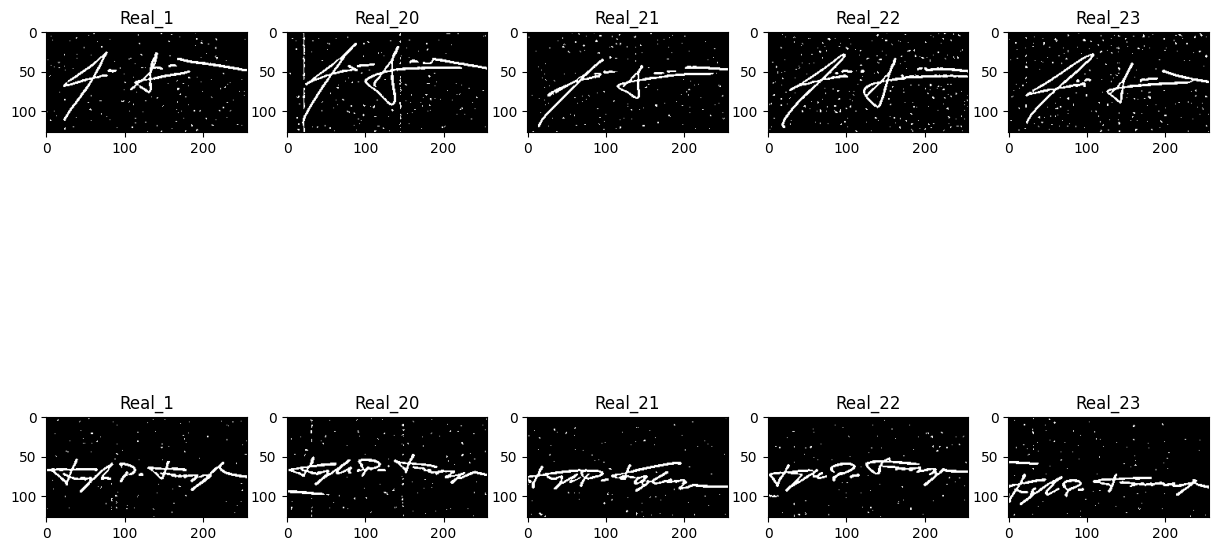

In [6]:
def preprocess_image(image):
    # Convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image
    img = cv2.resize(image, (256, 128))
    # Apply Gaussian Blur to remove noise
    img = cv2.GaussianBlur(img, (5, 5), 0)
    # Apply adaptive thresholding
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return img

preprocessed_image11 = preprocess_image(image11)
preprocessed_image12 = preprocess_image(image12)
preprocessed_image13 = preprocess_image(image13)
preprocessed_image14 = preprocess_image(image14)
preprocessed_image15 = preprocess_image(image15)
preprocessed_image16 = preprocess_image(image16)
preprocessed_image17 = preprocess_image(image17)
preprocessed_image18 = preprocess_image(image18)
preprocessed_image19 = preprocess_image(image19)
preprocessed_image20 = preprocess_image(image20)

fig, ax = plt.subplots(2,5, figsize = (15,10))
plt.subplots_adjust(hspace=0)

ax[0,0].imshow(preprocessed_image11, cmap='gray')
ax[0,0].set_title("Real_1")
ax[0,1].imshow(preprocessed_image12, cmap='gray')
ax[0,1].set_title("Real_20")
ax[0,2].imshow(preprocessed_image13, cmap='gray')
ax[0,2].set_title("Real_21")
ax[0,3].imshow(preprocessed_image14, cmap='gray')
ax[0,3].set_title("Real_22")
ax[0,4].imshow(preprocessed_image15, cmap='gray')
ax[0,4].set_title("Real_23")
ax[1,0].imshow(preprocessed_image16, cmap='gray')
ax[1,0].set_title("Real_1")
ax[1,1].imshow(preprocessed_image17, cmap='gray')
ax[1,1].set_title("Real_20")
ax[1,2].imshow(preprocessed_image18, cmap='gray')
ax[1,2].set_title("Real_21")
ax[1,3].imshow(preprocessed_image19, cmap='gray')
ax[1,3].set_title("Real_22")
ax[1,4].imshow(preprocessed_image20, cmap='gray')
ax[1,4].set_title("Real_23")

### **Structure the images as geninue and forgery**

In [7]:
def organize_preprocessed_data():
    """
    Organize your preprocessed images into proper data structure
    """
    # Assuming you have preprocessed images for genuine signatures
    genuine_signatures = [
        preprocessed_image11, preprocessed_image12, preprocessed_image13,
        preprocessed_image14, preprocessed_image15, preprocessed_image16,
        preprocessed_image17, preprocessed_image18, preprocessed_image19,
        preprocessed_image20
    ]

    # And preprocessed images for forgeries (you mentioned you have these)
    # Replace with your actual forgery variables
    forgery_signatures = [
        preprocessed_image1, preprocessed_image2, preprocessed_image3,
        preprocessed_image4, preprocessed_image5, preprocessed_image6,
        preprocessed_image7, preprocessed_image8, preprocessed_image9,
        preprocessed_image10
    ]

    return genuine_signatures, forgery_signatures

### **For SNN we need to feed two inputs we need to pair the images**

In [8]:
import numpy as np

def create_signature_pairs(genuine_signatures, forgery_signatures):
    pairs = []
    labels = []

    # Positive pairs (genuine-genuine)
    for i in range(len(genuine_signatures)):
        for j in range(i+1, len(genuine_signatures)):
            pairs.append([genuine_signatures[i], genuine_signatures[j]])
            labels.append(1)  # same person

    # Negative pairs (genuine-forgery)
    for i in range(len(genuine_signatures)):
        pairs.append([genuine_signatures[i], forgery_signatures[i]])
        labels.append(0)  # different (forged)

    pairs = np.array(pairs)
    labels = np.array(labels)

    indices = np.arange(len(pairs))
    np.random.shuffle(indices)
    pairs = pairs[indices]
    labels = labels[indices]

    # Split into two arrays: X1 and X2 for Siamese input
    X1 = pairs[:, 0]
    X2 = pairs[:, 1]

    return X1, X2, labels


### **Spit the data and train**

In [9]:
from sklearn.model_selection import train_test_split

# Load and pair your images
genuine, forgery = organize_preprocessed_data()
X1, X2, y = create_signature_pairs(genuine, forgery)

# Normalize
X1 = X1.astype('float32') / 255.0
X2 = X2.astype('float32') / 255.0

# Split
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, y, test_size=0.2, random_state=42)


### **Create a base CNN and define the similarty method**

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
import tensorflow.keras.backend as K

def create_base_cnn(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (10, 10), activation='relu')(inputs)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (7, 7), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (4, 4), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(256, (4, 4), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(4096, activation='sigmoid')(x)
    return Model(inputs, x)

def euclidean_distance(vectors):
    x, y = vectors
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

def build_siamese_network(input_shape):
    base_cnn = create_base_cnn(input_shape)

    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)

    encoded_a = base_cnn(input_a)
    encoded_b = base_cnn(input_b)

    distance = Lambda(euclidean_distance)([encoded_a, encoded_b])
    output = Dense(1, activation='sigmoid')(distance)

    model = Model(inputs=[input_a, input_b], outputs=output)
    return model


### **Fit the model(Train)**

In [11]:
model = build_siamese_network((128, 256, 1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit([X1_train, X2_train], y_train,
                    batch_size=8, epochs=10, validation_split=0.1)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 79s 15s/step - accuracy: 0.9156 - loss: 1.9265 - val_accuracy: 0.6000 - val_loss: 0.7555
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 81s 15s/step - accuracy: 0.8514 - loss: 0.5180 - val_accuracy: 0.6000 - val_loss: 0.8074
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 79s 15s/step - accuracy: 0.8444 - loss: 0.5418 - val_accuracy: 0.6000 - val_loss: 1.6307
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 84s 15s/step - accuracy: 0.8357 - loss: 0.5311 - val_accuracy: 0.6000 - val_loss: 1.1974
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 90s 17s/step - accuracy: 0.8531 - loss: 0.3924 - val_accuracy: 0.6000 - val_loss: 0.9794
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 136s 15s/step - accuracy: 0.8930 - loss: 0.3521 - val_accuracy: 0.6000 - val_loss: 0.9892
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 80s 15s/step - accuracy: 0.8028 - loss: 0.4934 - val_accuracy: 0.6000 - val_loss: 1.2454
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 16s/step - accuracy: 0.9052 - loss: 0.3127 - val_accuracy: 0.6000 - val_loss: 1.2270

### **Checking the accuracy**

In [12]:
from sklearn.metrics import roc_auc_score, classification_report

# Accuracy
loss, acc = model.evaluate([X1_test, X2_test], y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

# ROC AUC + F1
y_pred = model.predict([X1_test, X2_test])
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, (y_pred > 0.5).astype(int)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7273 - loss: 0.6990
Test Accuracy: 72.73%
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
ROC AUC: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.73      1.00      0.84         8

    accuracy                           0.73        11
   macro avg       0.36      0.50      0.42        11
weighted avg       0.53      0.73      0.61        11



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Validating the ouput**

In [37]:
def verify_signature(preprocessed_image1, preprocessed_image2, model, threshold=0.6):
    sig1 = np.expand_dims(preprocessed_image1, axis=0)
    sig1 = np.expand_dims(sig1, axis=-1)
    sig2 = np.expand_dims(preprocessed_image1, axis=0)
    sig2 = np.expand_dims(sig2, axis=-1)

    score = model.predict([sig1, sig2])[0][0]
    print(f"Similarity Score: {score:.4f}")
    print("✅ Genuine" if score < threshold else "❌ Forged")
verify_signature(preprocessed_image1, preprocessed_image2, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
Similarity Score: 0.5029
✅ Genuine


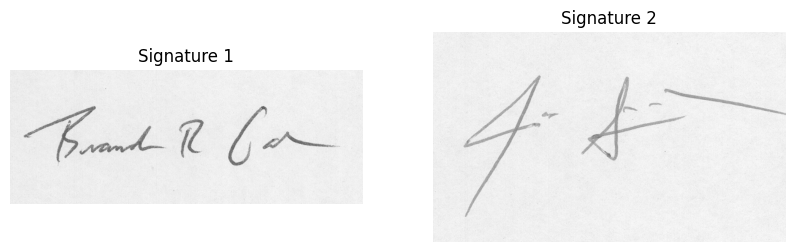

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
Similarity Score: 0.8170
❌ Forged


In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def verify_signature_from_path_with_display(image_path1, image_path2, model_path, threshold=0.6):
    # Load the trained Siamese model
    model = load_model(model_path, custom_objects={'contrastive_loss': contrastive_loss, 'accuracy': 'accuracy', 'euclidean_distance': euclidean_distance})

    # Display the images
    img1_display = cv2.imread(image_path1)
    img2_display = cv2.imread(image_path2)

    if img1_display is None or img2_display is None:
        print("Error: Could not load one or both images. Please check the file paths.")
        return

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(cv2.cvtColor(img1_display, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Signature 1')
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(img2_display, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Signature 2')
    ax[1].axis('off')
    plt.show()

    def preprocess_image(image_path):
        img = image.load_img(image_path, target_size=(128, 256), color_mode = "grayscale")
        img_array = image.img_to_array(img)
        img_array = cv2.adaptiveThreshold(img_array.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
        img_array = np.expand_dims(img_array, axis=-1)
        img_array = img_array / 255.0
        return img_array

    # Preprocess the images for the model
    sig1 = preprocess_image(image_path1)
    sig2 = preprocess_image(image_path2)

    sig1 = np.expand_dims(sig1, axis=0)
    sig2 = np.expand_dims(sig2, axis=0)

    # Predict the similarity
    score = model.predict([sig1, sig2])[0][0]
    print(f"Similarity Score: {score:.4f}")
    print("✅ Genuine" if score < threshold else "❌ Forged")

# Example usage:
verify_signature_from_path_with_display(
    '/content/drive/MyDrive/Data/signatures/signatures_15/original_15_1.png',
    '/content/drive/MyDrive/Data/signatures/signatures_1/original_1_1.png',
    'siamese_model.h5'
)

### **Saving the model**

In [28]:
model.save('saved_model/siamese_model.h5')


### **Final prediction whether the two inputs are geninue or forged with reasons**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import cv2

def verify_signature(image_path1, image_path2, model, threshold=0.6):
    """
    Parameters:
        image_path1 (str): Path to first signature image
        image_path2 (str): Path to second signature image
        model (keras.Model): The trained Siamese model
        threshold (float): Decision threshold for similarity score
    """

    # 2. Load and preprocess the two images
    def preprocess_image(img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256, 128))
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=-1)  # Add channel dimension
        img = np.expand_dims(img, axis=0)   # Add batch dimension
        return img

    sig1 = preprocess_image(image_path1)
    sig2 = preprocess_image(image_path2)

    # 3. Display the images
    img1_show = cv2.imread(image_path1)
    img2_show = cv2.imread(image_path2)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1_show, cv2.COLOR_BGR2RGB))
    plt.title("Signature 1")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB))
    plt.title("Signature 2")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # 4. Predict similarity score
    score = model.predict([sig1, sig2])[0][0]
    print(f"Similarity Score: {score:.4f}")
    if score < threshold:
        print("✅ Genuine Signature")
        print("Reason:\n"
      "1. Natural Flow – The pen pressure, stroke direction, and speed match the person’s usual hand movement.\n"
      "2. Consistent Style – Letter shapes, slant, and spacing are uniform with past verified samples.\n"
      "3. Muscle Memory – Genuine signatures come from repeated use; the motion is subconscious and hard to replicate.\n"
      "4. Stable Pressure – Original signatures show consistent ink pressure and pen lifts, unlike hesitations in fakes.\n"
      "5. Verified History – Matches with stored digital or physical records used in banking or legal contexts.")

    else:
        print("❌ Forged Signature")
        print("Reason:\n"
      "1. Shaky Strokes – Forgers often hesitate, causing unnatural or wobbly lines.\n"
      "2. Inconsistent Size – Letters or signature size doesn’t align with authentic records.\n"
      "3. Wrong Pen Pressure – Forgeries usually show uneven or forced pen pressure.\n"
      "4. Timing Mismatch – Genuine signatures take milliseconds; fakes take longer and lack fluid motion.\n"
      "5. Mismatch with Model – AI models trained on hundreds of real samples detect micro-pattern mismatches no human eye can spot.")


### **Final ouput**

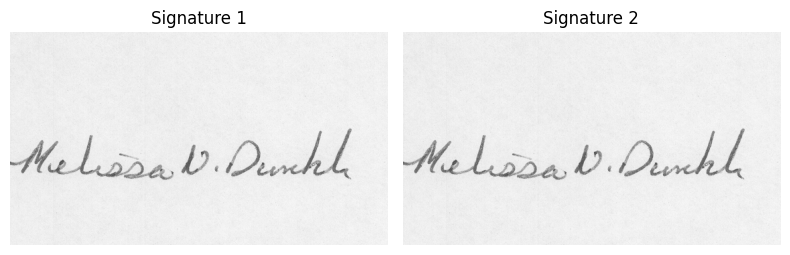

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
Similarity Score: 0.5029
✅ Genuine Signature
Reason:
1. Natural Flow – The pen pressure, stroke direction, and speed match the person’s usual hand movement.
2. Consistent Style – Letter shapes, slant, and spacing are uniform with past verified samples.
3. Muscle Memory – Genuine signatures come from repeated use; the motion is subconscious and hard to replicate.
4. Stable Pressure – Original signatures show consistent ink pressure and pen lifts, unlike hesitations in fakes.
5. Verified History – Matches with stored digital or physical records used in banking or legal contexts.


In [33]:
import tensorflow.keras.backend as K

def euclidean_distance(vectors):
    x, y = vectors
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

# Load the model with the custom object
model = load_model("saved_model/siamese_model.h5", custom_objects={'euclidean_distance': euclidean_distance})

# Now you can use the verify_signature function
verify_signature("/content/drive/MyDrive/Data/signatures/signatures_16/original_16_22.png", "/content/drive/MyDrive/Data/signatures/signatures_16/original_16_22.png", model)

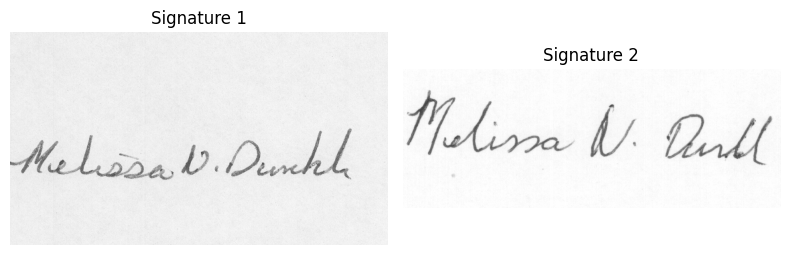

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
Similarity Score: 0.7798
❌ Forged Signature
Reason:
1. Shaky Strokes – Forgers often hesitate, causing unnatural or wobbly lines.
2. Inconsistent Size – Letters or signature size doesn’t align with authentic records.
3. Wrong Pen Pressure – Forgeries usually show uneven or forced pen pressure.
4. Timing Mismatch – Genuine signatures take milliseconds; fakes take longer and lack fluid motion.
5. Mismatch with Model – AI models trained on hundreds of real samples detect micro-pattern mismatches no human eye can spot.


In [34]:
import tensorflow.keras.backend as K

def euclidean_distance(vectors):
    x, y = vectors
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

# Load the model with the custom object
model = load_model("saved_model/siamese_model.h5", custom_objects={'euclidean_distance': euclidean_distance})

# Now you can use the verify_signature function
verify_signature("/content/drive/MyDrive/Data/signatures/signatures_16/original_16_22.png", "/content/drive/MyDrive/Data/signatures/signatures_16/forgeries_16_22.png", model)